# How Not To Put A Nation To Sleep
## Blake Whittington and Gabriele Spiridaviciute
***
## Are People a Good Judge of Their Own Sleep and Health?
### Final Cluster Analysis

The main purpose of this notebook is to show which clusters are the most healthy vs unhealthy as well as to show which clusters are suffering the most from each substance. We already did a sort of preliminary version of this in 3023_initial_cluster_results.ipynb, however this technique used in this notebook is more advanced and will be used in the final report.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load dataframes

In [2]:
alcohol_results = pd.read_pickle('../data_file/cleaned_data_pickle/alcohol_dataframe_results.pickle')
tobacco_results = pd.read_pickle('../data_file/cleaned_data_pickle/tobacco_dataframe_results.pickle')
caffeine_results = pd.read_pickle('../data_file/cleaned_data_pickle/caffeine_dataframe_results.pickle')
cluster_desirability_df = pd.read_pickle('../data_file/cleaned_data_pickle/cluster_descriptions.pickle')

In [3]:
alcohol_results

,id,age,employment_status,gender,state,bed_time_weekdays,wake_up_weekdays,bed_time_wrong,wake_up_wrong,time_awake_wrong,...,num_drinks_max,num_drinks_min,calc_days,num_days_max,num_days_min,calculated_drinks_min,calculated_drinks_max,total_drinks,limit_status,cluster_group
0,1,39,3,Male,CO,14,17,1000.0,2050.0,1050.0,...,0,0,0,0,0,0,0,0 Drinks,Below Drinking Limit,2.0
1,2,57,1,Female,AL,10,7,900.0,1800.0,900.0,...,0,0,0,0,0,0,0,0 Drinks,Below Drinking Limit,4.0
2,3,51,1,Male,NV,14,9,1000.0,1850.0,850.0,...,2,1,1-3,3,1,1,6,1-6 Drinks,Below Drinking Limit,6.0
3,3,38,1,Male,FL,15,10,1025.0,1875.0,850.0,...,2,1,4-6,6,4,4,12,4-12 Drinks,Below Drinking Limit,NaN
4,4,60,1,Male,CT,18,8,1100.0,1825.0,725.0,...,2,1,4-6,6,4,4,12,4-12 Drinks,Below Drinking Limit,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,956,43,2,Female,NY,18,15,1100.0,2000.0,900.0,...,0,0,0,0,0,0,0,0 Drinks,Below Drinking Limit,NaN
996,959,26,1,Male,NY,2,13,1201.7,1950.0,748.3,...,0,0,0,0,0,0,0,0 Drinks,Below Drinking Limit,2.0
997,963,45,1,Female,NY,18,11,1100.0,1900.0,800.0,...,2,1,1-3,3,1,1,6,1-6 Drinks,Below Drinking Limit,NaN
998,964,53,1,Male,NE,16,7,1050.0,1800.0,750.0,...,2,1,0,0,0,0,0,0 Drinks,Below Drinking Limit,3.0


In [4]:
# alcohol_results.set_index('index', inplace=True)

In [5]:
alcohol_results = alcohol_results.loc[:,'limit_status':]

In [6]:
# alcohol_results = alcohol_results[alcohol_results['limit_status'] == 'Above Drinking Limit']
alcohol_results = alcohol_results.replace({'limit_status':{'Below Drinking Limit' : np.nan, 'Undeterminable Drinking Limit': np.nan }})

In [7]:
alcohol_results

,limit_status,cluster_group
0,NaN,2.0
1,NaN,4.0
2,NaN,6.0
3,NaN,NaN
4,NaN,NaN
...,...,...
995,NaN,NaN
996,NaN,2.0
997,NaN,NaN
998,NaN,3.0


In [8]:
tobacco_results = tobacco_results.loc[:,'smoking_status'].to_frame()

In [9]:
tobacco_results = tobacco_results.replace({'smoking_status':{'Non-Smoker' : np.nan}})

In [10]:
tobacco_results

,smoking_status
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
995,NaN
996,NaN
997,NaN
998,NaN


In [11]:
caffeine_results = caffeine_results[['caffeine_threshold_level', 'cluster_group']]

In [12]:
caffeine_results = caffeine_results.replace({'caffeine_threshold_level':{'Below Daily Threshold' : np.nan}})

In [13]:
caffeine_results

,caffeine_threshold_level,cluster_group
0,NaN,2.0
1,NaN,4.0
2,NaN,6.0
3,NaN,NaN
4,NaN,NaN
...,...,...
995,NaN,NaN
996,NaN,2.0
997,NaN,NaN
998,Above Daily Threshold,3.0


## Merge dataframes
The dataframes are merged on the only dataframe that still has all surveyors in its dataframe, caffeine_results.

In [14]:
final_df = tobacco_results.join(caffeine_results)

In [15]:
final_df

,smoking_status,caffeine_threshold_level,cluster_group
0,NaN,NaN,2.0
1,NaN,NaN,4.0
2,NaN,NaN,6.0
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
995,NaN,NaN,NaN
996,NaN,NaN,2.0
997,NaN,NaN,NaN
998,NaN,Above Daily Threshold,3.0


In [16]:
final_df = pd.concat([final_df, alcohol_results], axis=1)

In [17]:
final_df = final_df.T.groupby(level=0).first().T

In [18]:
final_df

,caffeine_threshold_level,cluster_group,limit_status,smoking_status
0,NaN,2.0,NaN,NaN
1,NaN,4.0,NaN,NaN
2,NaN,6.0,NaN,NaN
3,None,None,None,None
4,None,None,None,None
...,...,...,...,...
995,None,None,None,None
996,NaN,2.0,NaN,NaN
997,None,None,None,None
998,Above Daily Threshold,3.0,None,None


In [19]:
# final_df['cluster_group'] = final_df['cluster_group'].dropna()
final_df = final_df[final_df['cluster_group'].notna()]

Due to our desire to analyse only the clusters that are directly comparable, we take our dataframes 4 and 1 which do not have identical health and sleep ratings.

In [20]:
final_df = final_df[final_df['cluster_group'] != 4.0]
final_df = final_df[final_df['cluster_group'] != 1.0]

In [21]:
final_df

,caffeine_threshold_level,cluster_group,limit_status,smoking_status
0,NaN,2.0,NaN,NaN
2,NaN,6.0,NaN,NaN
7,NaN,3.0,NaN,NaN
9,NaN,14.0,NaN,NaN
12,Above Daily Threshold,3.0,None,None
...,...,...,...,...
980,Above Daily Threshold,2.0,None,Current Smoker
987,NaN,14.0,NaN,NaN
993,NaN,2.0,NaN,NaN
996,NaN,2.0,NaN,NaN


Numpy is used to create a list of how many problems each surveyor is currently dealing with.

In [22]:
num_problems_array = np.array(final_df.isnull().sum(axis=1).tolist())

In [23]:
num_problems_array

array([3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2,
       3, 3, 3, 2, 2, 1, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3,
       3, 3, 2, 1, 2, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 3, 3,
       2, 3, 3, 3, 3, 1, 1, 2, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1,
       3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 2, 3, 3, 2, 2,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 2, 1, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3,

In [24]:
final_df['count'] = 3 - num_problems_array

In [25]:
final_df['count']

0      0
2      0
7      0
9      0
12     1
      ..
980    2
987    0
993    0
996    0
998    1
Name: count, Length: 343, dtype: int64

An interesting note is that not one person suffers from all 3 problems. There only exist survyors who are currently dealing with at max 2 problems as some combination of excess caffeine, excess alcohol, and excess tobacco usage.

In [26]:
final_df['count'].value_counts()

0    257
1     65
2     21
Name: count, dtype: int64

Before we can start plotting the data, we need to create a dataframe that contains the cluster groups and what percent of each suveyors unhealthy habits are being taken up by specific substances.

## Smoking Portion

In [27]:
final_df['smoking_problem'] = 0
final_df = final_df[['cluster_group', 'smoking_status', 'limit_status', 'caffeine_threshold_level', 'count', 'smoking_problem']]


In [28]:
group = final_df.groupby('cluster_group')



In [29]:
final_df = final_df[final_df['count'] != 0]

In [30]:
final_df

,cluster_group,smoking_status,limit_status,caffeine_threshold_level,count,smoking_problem
12,3.0,None,None,Above Daily Threshold,1,0
17,3.0,None,None,Above Daily Threshold,1,0
43,3.0,Current Smoker,None,None,1,0
46,6.0,Current Smoker,None,None,1,0
61,6.0,None,Above Drinking Limit,None,1,0
...,...,...,...,...,...,...
960,3.0,Current Smoker,None,None,1,0
967,14.0,Current Smoker,None,Above Daily Threshold,2,0
976,14.0,Current Smoker,Above Drinking Limit,None,2,0
980,2.0,Current Smoker,None,Above Daily Threshold,2,0


In [31]:
final_df_copy = final_df.copy()
final_df_copy = final_df_copy[final_df_copy.smoking_status.notnull()]
final_df_copy ['smoking_problem'] = 1/final_df_copy ['count']

In [32]:
final_df_copy['smoking_problem']

43     1.0
46     1.0
77     1.0
133    1.0
164    0.5
177    1.0
185    1.0
187    1.0
205    1.0
209    0.5
235    1.0
238    1.0
272    1.0
295    1.0
305    1.0
313    1.0
336    1.0
389    1.0
430    0.5
434    0.5
437    0.5
447    0.5
472    0.5
479    0.5
518    0.5
544    1.0
573    1.0
579    0.5
627    1.0
635    0.5
684    1.0
688    1.0
702    0.5
739    1.0
776    1.0
816    0.5
818    0.5
839    1.0
844    1.0
867    1.0
888    0.5
929    1.0
948    1.0
960    1.0
967    0.5
976    0.5
980    0.5
Name: smoking_problem, dtype: float64

In [33]:
final_df = pd.merge(final_df, final_df_copy[['smoking_problem']], left_on = final_df.index, right_on = final_df_copy.index, how='left')

In [34]:
final_df.set_index('key_0', inplace=True)
final_df.drop('smoking_problem_x', axis=1, inplace=True)

In [35]:
final_df.groupby('cluster_group')['smoking_problem_y'].sum()

cluster_group
2.0      9.0
3.0     11.0
6.0      6.0
14.0    12.0
Name: smoking_problem_y, dtype: float64

In [36]:
# final_df['smoking_status'].isnull().sum(axis=1).tolist()

In [37]:
# df_groupby_cluster = final_df.groupby(['cluster_group', 'smoking_status','limit_status'])['cluster_group'].size().unstack('smoking_status','limit_status')
# df_groupby_cluster

In [38]:
# df_groupby_cluster = final_df.groupby(['cluster_group', 'smoking_status','limit_status']).size()
# df_groupby_cluster

## Alcohol Portion

In [39]:
final_df_copy = final_df.copy()
final_df_copy = final_df_copy[final_df_copy.limit_status.notnull()]
final_df_copy['alcohol_problem'] = 1/final_df_copy ['count']

In [40]:
final_df_copy['alcohol_problem']

key_0
61     1.0
93     1.0
115    1.0
207    0.5
307    0.5
329    1.0
383    1.0
452    0.5
518    0.5
635    0.5
819    1.0
976    0.5
Name: alcohol_problem, dtype: float64

In [41]:
final_df = pd.merge(final_df, final_df_copy[['alcohol_problem']], left_on = final_df.index, right_on = final_df_copy.index, how='left')

In [42]:
final_df

,key_0,cluster_group,smoking_status,limit_status,caffeine_threshold_level,count,smoking_problem_y,alcohol_problem
0,12,3.0,None,None,Above Daily Threshold,1,NaN,NaN
1,17,3.0,None,None,Above Daily Threshold,1,NaN,NaN
2,43,3.0,Current Smoker,None,None,1,1.0,NaN
3,46,6.0,Current Smoker,None,None,1,1.0,NaN
4,61,6.0,None,Above Drinking Limit,None,1,NaN,1.0
...,...,...,...,...,...,...,...,...
81,960,3.0,Current Smoker,None,None,1,1.0,NaN
82,967,14.0,Current Smoker,None,Above Daily Threshold,2,0.5,NaN
83,976,14.0,Current Smoker,Above Drinking Limit,None,2,0.5,0.5
84,980,2.0,Current Smoker,None,Above Daily Threshold,2,0.5,NaN


In [43]:
final_df.set_index('key_0', inplace=True)
final_df

,cluster_group,smoking_status,limit_status,caffeine_threshold_level,count,smoking_problem_y,alcohol_problem
key_0,,,,,,,
12,3.0,None,None,Above Daily Threshold,1,NaN,NaN
17,3.0,None,None,Above Daily Threshold,1,NaN,NaN
43,3.0,Current Smoker,None,None,1,1.0,NaN
46,6.0,Current Smoker,None,None,1,1.0,NaN
61,6.0,None,Above Drinking Limit,None,1,NaN,1.0
...,...,...,...,...,...,...,...
960,3.0,Current Smoker,None,None,1,1.0,NaN
967,14.0,Current Smoker,None,Above Daily Threshold,2,0.5,NaN
976,14.0,Current Smoker,Above Drinking Limit,None,2,0.5,0.5


In [44]:
final_df.groupby('cluster_group')['alcohol_problem'].sum()

cluster_group
2.0     2.5
3.0     2.0
6.0     2.0
14.0    2.5
Name: alcohol_problem, dtype: float64

## Caffeine Portion

In [45]:
final_df_copy = final_df.copy()
final_df_copy = final_df_copy[final_df_copy.caffeine_threshold_level.notnull()]
final_df_copy['caffeine_problem'] = 1/final_df_copy ['count']

In [46]:
final_df = pd.merge(final_df, final_df_copy[['caffeine_problem']], left_on = final_df.index, right_on = final_df_copy.index, how='left')
final_df.set_index('key_0', inplace=True)

In [47]:
final_df.groupby('cluster_group')['caffeine_problem'].sum()

cluster_group
2.0     11.5
3.0     15.0
6.0      2.0
14.0    10.5
Name: caffeine_problem, dtype: float64

## Results

In [48]:
cluster_desirability_df
cluster_desirability_df = cluster_desirability_df.loc[[1,4,2,3,6,14]]
cluster_desirability_df = cluster_desirability_df.loc[2:,:]

In [49]:
total_in_clusters=cluster_desirability_df['cluster_count']

In [50]:
final_df

,cluster_group,smoking_status,limit_status,caffeine_threshold_level,count,smoking_problem_y,alcohol_problem,caffeine_problem
key_0,,,,,,,,
12,3.0,None,None,Above Daily Threshold,1,NaN,NaN,1.0
17,3.0,None,None,Above Daily Threshold,1,NaN,NaN,1.0
43,3.0,Current Smoker,None,None,1,1.0,NaN,NaN
46,6.0,Current Smoker,None,None,1,1.0,NaN,NaN
61,6.0,None,Above Drinking Limit,None,1,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...
960,3.0,Current Smoker,None,None,1,1.0,NaN,NaN
967,14.0,Current Smoker,None,Above Daily Threshold,2,0.5,NaN,0.5
976,14.0,Current Smoker,Above Drinking Limit,None,2,0.5,0.5,NaN


In [51]:
final_df = final_df.rename(columns = {'cluster_group': 'Cluster Group', 'smoking_status': 'Smoking Status', 'limit_status': 'Alcohol Status', 'caffeine_below_threshold': 'Caffeine Status', 'smoking_problem_y': 'Smoking Problem', 'alcohol_problem': 'Alcohol Problem', 'caffeine_problem': 'Caffeine Problem'})

In [52]:
cluster_problem_percentages = final_df.groupby('Cluster Group')['Smoking Problem', 'Alcohol Problem', 'Caffeine Problem'].sum()

<ipython-input-52-119f8bcaa03a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_problem_percentages = final_df.groupby('Cluster Group')['Smoking Problem', 'Alcohol Problem', 'Caffeine Problem'].sum()


In [53]:
cluster_problem_percentages

,Smoking Problem,Alcohol Problem,Caffeine Problem
Cluster Group,,,
2.0,9.0,2.5,11.5
3.0,11.0,2.0,15.0
6.0,6.0,2.0,2.0
14.0,12.0,2.5,10.5


In [54]:
total_cluster_problems=cluster_problem_percentages.sum(axis=1).to_frame()

In [55]:
np.array(total_cluster_problems)

array([[23.],
       [28.],
       [10.],
       [25.]])

In [56]:
total_cluster_problems.to_numpy()

array([[23.],
       [28.],
       [10.],
       [25.]])

Due to how numpy subtracts the two arrays, only the diagonal of the resultant matrix must be taken

In [57]:
health_individuals_in_clusters = np.diag(np.subtract(np.array(total_in_clusters),np.array(total_cluster_problems)))

In [58]:
cluster_problem_percentages['Smoking Problem']

Cluster Group
2.0      9.0
3.0     11.0
6.0      6.0
14.0    12.0
Name: Smoking Problem, dtype: float64

In [59]:
health_individuals_in_clusters


array([73., 89., 49., 46.])

In [60]:
total_cluster_problems


,0
Cluster Group,
2.0,23.0
3.0,28.0
6.0,10.0
14.0,25.0


Ratio consists of the ratio of the number of healthy individuals in a cluster to the number of unhealthy individuals in that cluster.

In [61]:
columns = ['Healthy', 'Unhealthy']
ratio = pd.DataFrame(columns=columns, index=total_cluster_problems.index)

In [62]:
ratio['Healthy'] = health_individuals_in_clusters
ratio['Unhealthy'] = total_cluster_problems


In [63]:
ratio

,Healthy,Unhealthy
Cluster Group,,
2.0,73.0,23.0
3.0,89.0,28.0
6.0,49.0,10.0
14.0,46.0,25.0


In [64]:
ratio['Total'] = total_in_clusters

In [65]:
ratio['Healthy Percentage'] = ratio['Healthy']/ratio['Total']
ratio['Unhealthy Percentage'] = ratio['Unhealthy']/ratio['Total']

In [66]:
ratio.loc[:, ['Healthy Percentage', 'Unhealthy Percentage']] = ratio.loc[:, ['Healthy Percentage', 'Unhealthy Percentage']] * 100

In [67]:
ratio

,Healthy,Unhealthy,Total,Healthy Percentage,Unhealthy Percentage
Cluster Group,,,,,
2.0,73.0,23.0,96,76.041667,23.958333
3.0,89.0,28.0,117,76.068376,23.931624
6.0,49.0,10.0,59,83.050847,16.949153
14.0,46.0,25.0,71,64.788732,35.211268


In [68]:
ratio = ratio.sort_values('Unhealthy Percentage')
ratio

,Healthy,Unhealthy,Total,Healthy Percentage,Unhealthy Percentage
Cluster Group,,,,,
6.0,49.0,10.0,59,83.050847,16.949153
3.0,89.0,28.0,117,76.068376,23.931624
2.0,73.0,23.0,96,76.041667,23.958333
14.0,46.0,25.0,71,64.788732,35.211268


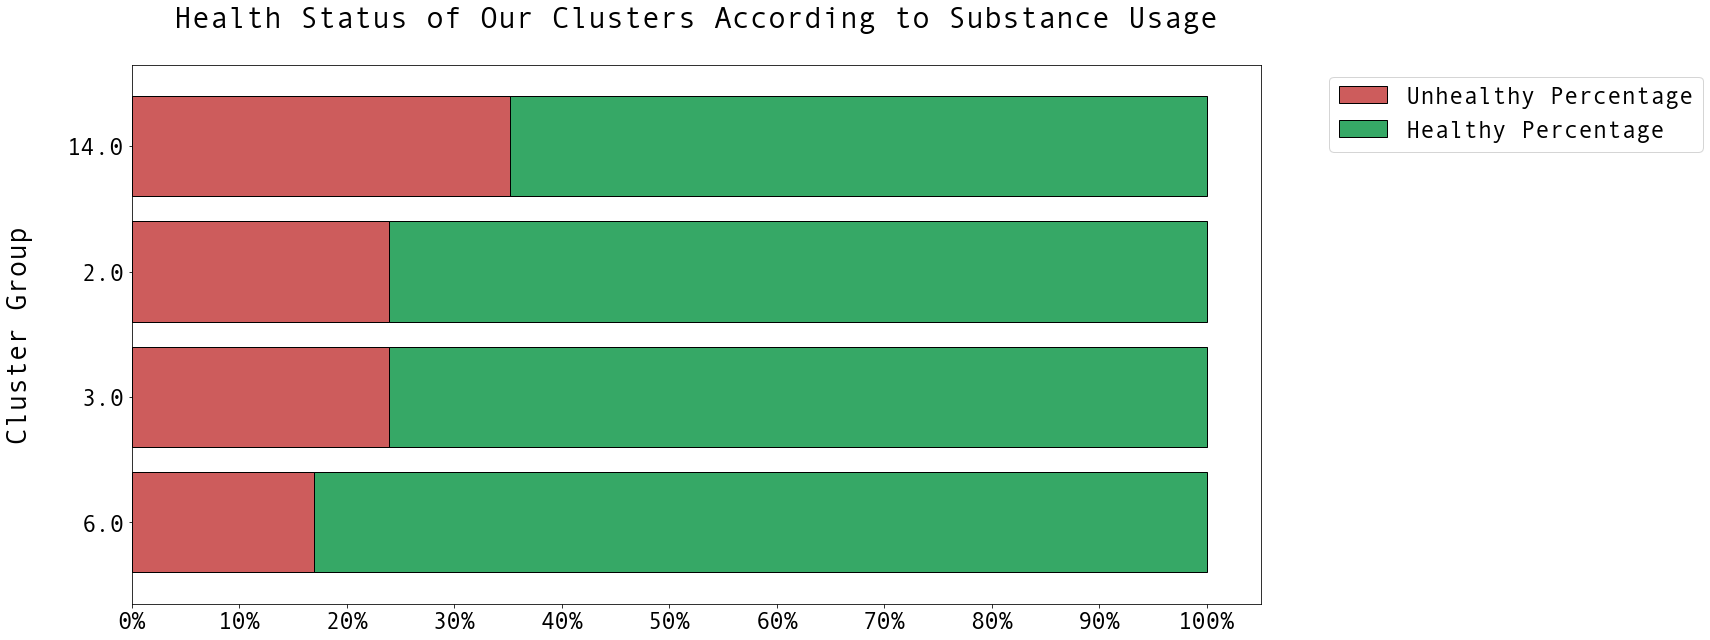

In [69]:
import matplotlib.ticker as mtick
width = .8
fig, ax = plt.subplots(figsize=(24, 9))

ratio.loc[:, ['Unhealthy Percentage', 'Healthy Percentage']].plot.barh(ax=ax, width=width, stacked=True, color=('#CD5C5C','#36a866'),edgecolor='black')
ax.set_title('Health Status of Our Clusters According to Substance Usage\n',fontsize = 30,fontfamily = 'Andale Mono')
ax.set_ylabel('Cluster Group\n',fontsize = 28,fontfamily = 'Andale Mono')

ax.xaxis.set_tick_params(labelsize=24)
ax.yaxis.set_tick_params(labelsize=24)
plt.xticks(fontname = 'Andale Mono') 
plt.yticks(fontname = 'Andale Mono') 

ax.legend(bbox_to_anchor=(1.05, 1),prop={'size': 24,'family':'Andale Mono'})

plt.xticks(np.arange(0, 100+1, 10))
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

plt.tight_layout()

plt.savefig('../data_file/graphs/PNG/3024_healthy_unhealthy_cluster.png', dpi=300)
plt.savefig('../data_file/graphs/JPG/3024_healthy_unhealthy_cluster.jpg', dpi=300)

In [70]:
cluster_problem_percentages

,Smoking Problem,Alcohol Problem,Caffeine Problem
Cluster Group,,,
2.0,9.0,2.5,11.5
3.0,11.0,2.0,15.0
6.0,6.0,2.0,2.0
14.0,12.0,2.5,10.5


In [71]:
ratio['Unhealthy']

Cluster Group
6.0     10.0
3.0     28.0
2.0     23.0
14.0    25.0
Name: Unhealthy, dtype: float64

In [72]:
cluster_problem_percentages['Smoking Problem'] = (cluster_problem_percentages['Smoking Problem'] / ratio['Unhealthy']) * 100
cluster_problem_percentages['Alcohol Problem'] = (cluster_problem_percentages['Alcohol Problem'] / ratio['Unhealthy']) * 100
cluster_problem_percentages['Caffeine Problem'] = (cluster_problem_percentages['Caffeine Problem'] / ratio['Unhealthy']) * 100

In [73]:
cluster_problem_percentages = cluster_problem_percentages[['Smoking Problem','Caffeine Problem', 'Alcohol Problem']]

In [74]:
cluster_problem_percentages

,Smoking Problem,Caffeine Problem,Alcohol Problem
Cluster Group,,,
2.0,39.130435,50.000000,10.869565
3.0,39.285714,53.571429,7.142857
6.0,60.000000,20.000000,20.000000
14.0,48.000000,42.000000,10.000000


In [75]:
# df.reindex(["Z", "C", "A"])
cluster_problem_percentages = cluster_problem_percentages.reindex(ratio.index)

In [76]:
cluster_problem_percentages

,Smoking Problem,Caffeine Problem,Alcohol Problem
Cluster Group,,,
6.0,60.000000,20.000000,20.000000
3.0,39.285714,53.571429,7.142857
2.0,39.130435,50.000000,10.869565
14.0,48.000000,42.000000,10.000000


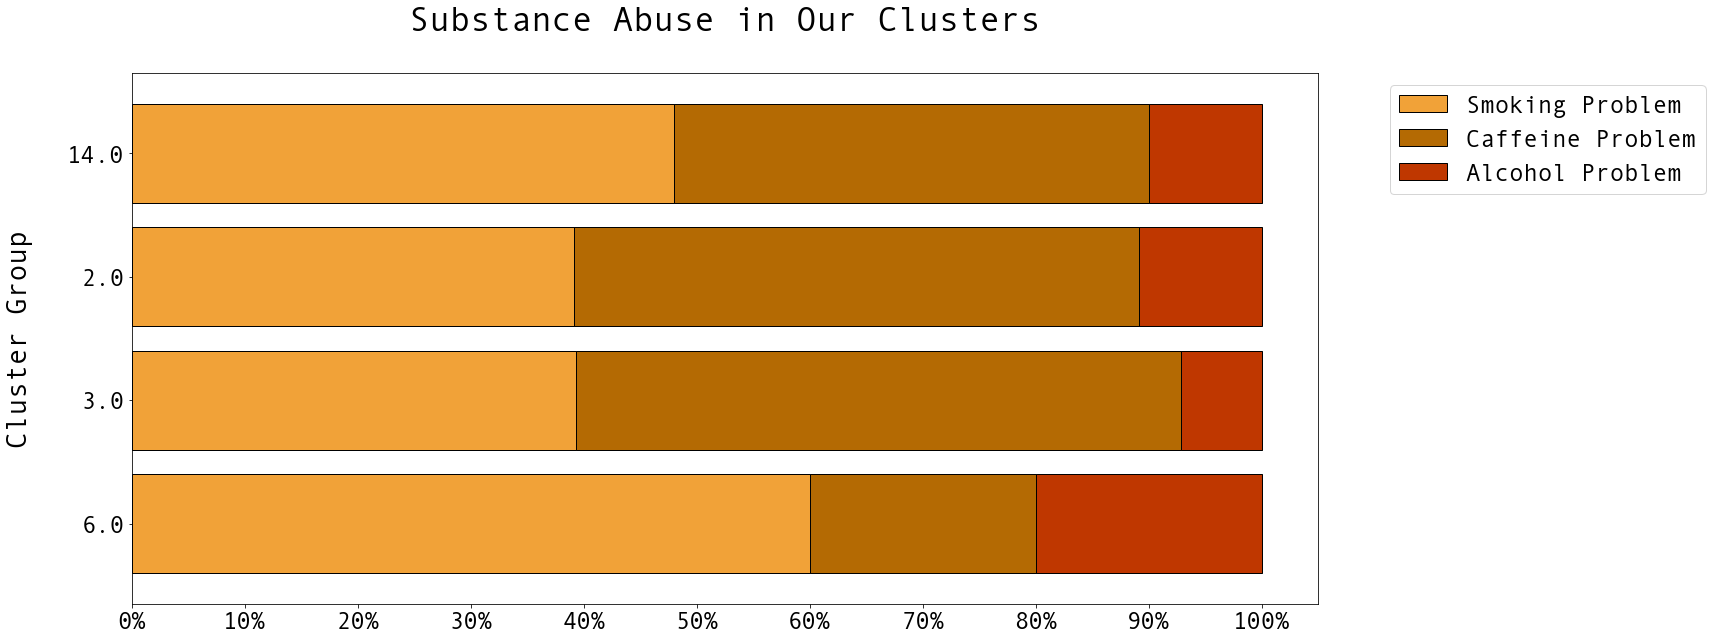

In [77]:
import matplotlib.ticker as mtick
width = .8
fig, ax = plt.subplots(figsize=(24, 9))
# plt.title('Cluster Healthy vs Unhealthy Percents')
ax.set_title('Substance Abuse in Our Clusters\n',fontsize = 34,fontfamily = 'Andale Mono')


cluster_problem_percentages.plot.barh(ax=ax, width=width, stacked=True, color=('#F1A238','#b46a03', '#bf3700'),edgecolor='black')

plt.xticks(np.arange(0, 100+1, 10))
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(bbox_to_anchor=(1.05, 1),prop={'size': 24,'family':'Andale Mono'})

ax.set_ylabel('Cluster Group\n',fontsize = 28,fontfamily = 'Andale Mono')

ax.xaxis.set_tick_params(labelsize=24)
ax.yaxis.set_tick_params(labelsize=24)
plt.xticks(fontname = 'Andale Mono') 
plt.yticks(fontname = 'Andale Mono') 

plt.tight_layout()

plt.savefig('../data_file/graphs/PNG/3024_problems_in_clusters.png', dpi=300)
plt.savefig('../data_file/graphs/JPG/3024_problems_in_clusters.jpg', dpi=300)